# Student Presentation: Semantic Similarity Analysis for Aeon essays for Genre Classifications


*Disclaimer: ChatGPT and Github Copilot are used in proofreading contents, generating and debugging codes, generating statistical analysis in this assignment.*


## Introduction



*Aeon* magazine (https://aeon.co/), launched in 2012, is a digital magazine renowned for its commitment to deep, thought-provoking contents in the broad realms of humanitics and social subjects, appealing to an audience that values comprehensive analysis and original insights on various topics. While the website also contains audio and video formats, most of *Aeon*'s contents are published through its signature *Essay* format—longform argumentative pieces ranging from 2,500 to 5,000 words. Each Essay provides an in-depth discussion into a particular issue with academic language. According to the *Aeon* website, all Essays are meticulously crafted through an intensive editing process, during which they are fact-checked and copyedited across 3 to 5 drafts over a three-month period to ensure the highest quality. As a regular reader of *Aeon*, the unique linguistic style of these Essays has capture my research interests.

Due to the variety of the topics covered by these Essays, all contents on Aeon website is categorized into a three layered structure: each Essay will be classified into a specific subtopic, which is further organized into five main disciplines: Philosophy, Psychology, Society, Science, and Culture. For example, an Essay titled "The new architecture wars" is categorized into the subtopic of "architecture", which belongs to the genre of Culture. On the Aeon website, one can find information about the complete lists of subtopics that belong to each genre. 


### Semantic Similarity and Text Classification

**Semantic similarity** analysis in spaCy refers to the process of determining the similarity between two pieces of text by comparing the word vectors or "word embeddings" of their tokens. 

**Word embeddings** are unique multi-dimensional mathematic representations of words, capturing their meanings, syntactic properties, and relationships with other words. These embeddings are learned from large datasets of text and can encode various linguistic patterns and semantic relationships. When performing semantic similarity analysis, spaCy typically averages the vectors of all tokens in each document or text span to produce a document vector. The similarity between any two texts is then calculated using the cosine similarity between their respective document vectors.

Semantic Similarity comparisons have been widely used for automatic genre classification of textual materials. The use of semantic similarity in text classification has been explored by Zhang (2013), who found that it can improve the performance of dimension-sensitive learning algorithms. Asheghi (2015) further discusses the challenges of genre classification, particularly in web genres, and proposes a method for automatic genre classification using a combination of supervised and semi-supervised machine learning. Nauer (2006) presents an approach for classifying documents based on semantic similarity, using annotated content represented by a labeled tree and a reasoning process. Lee (2002) introduces a method for text genre classification based on statistically selected features from both subject-classified and genre-classified training data, which outperforms a direct application of a statistical learner. Overall, these studies highlight the potential of semantic similarity in improving genre classification, particularly in the context of web genres.

## Research Questions


In the current research, I am interested in exploring the potential for automatically classifying the Essays through semantic similarity comparisons. 

Three research questions are addressed:

### **1. What is the semantic similarity between the subtopics within/across genres?**

Given that subtopics can be analyzed as meaningful phrases, I am interested in analyzing the semantic similarity for these phrases used for describing Essays. Many overlaps can be found between subtopics. For example, a subtopic named "bioethics" in the genre of Philosophy might have high similarity with the subtopic named "biology" in Science genre. High similarity scores across genres might also mediate the semantic similarity between Essay and genres.

### **2. Can we establish a standard of identifying the genre that each essay belongs to by comparing the semantic similarity of these essays to the subtopic string for each genre?**

In this context, subtopic string is defined as the string of the combination of all subtopics that belongs to each genre. Each genre will have its own subtopic string, which will be used as a basis of comparison for semantic similarity of all essays.


### **3. Can semantic similarity scores, derived from comparing essays to aggregated genre descriptions within genres, effectively predict the genre of an essay, and how does the accuracy of this method compare across different genres?**

This is addressed by model training through fitting a logistic regression to the dataset. I am interested in estbalishing a predicting model and its accuracy.




### Hypothesis 1: Semantic Similarity Between Topics 

*   *H0*: The mean similarity scores between topics is not significantly different within and across genre
*   *Ha*: The mean similarity scores between topics is significantly different within and across genre

### Hypothesis 2: Semantic Similarity Between Essays and Genres

*   *H0*: There is no significant differences in the mean semantic similarity scoring between different topics for each essay
*   *Ha*: There are significant differences in the mean semantic similarity scoring between different topics for each essay. Specifically, an essay will have the highest similarity score for the genre that it is categorized with. 

### Hypothesis 3: Accuracy of Prediction Model
*   *H0*: Prediction model will not be able to identify between topics with significant accuracy using semantic similarity scorings.
*   *Ha*: Prediction model will be able to identify between topics with significant accuracy using semantic similarity scorings 

## Data

### Dataset and Modifications


The original dataset can be found on https://www.kaggle.com/datasets/mannacharya/aeon-essays-dataset. It contains over 2300 essays covering diverse topics and is directly scraped from the Aeon website. 

**Data Modification**: Two of the fields in the original dataset (source url of the essay and thumbnail image url) are excluded for convenience of analysis. While the original dataset does not contain information about the genre of each essay, the *Aeon* website lists out all the essay subtopics that belongs to one of the five topics. Thus, the title that each essay belongs to is manually encoded as the "genre" field of the dataset. Finally, the essay content will be lowercased and removed of stopwords, while will be stored in the "cw_text" column.

The final dataset contains the following fields:

* title: Subtopics of the Essay 
* description: A Brief Summary / Preview of the Essay
* essay: Complete Essay Content
* authors: Authors (separated by '&' if multiple)
* genre: Genre that the Essay Belongs to (Philosophy, Science, Society, Psychology or Culture)
* cw_text: Lowercased Essay Contents with Stopwords Removed
* (genre_name)_similarity_score (x5): Five columns, Similarity Score for the given Genre for each Essay 

The dataset has a total sample size of 2235 essays, with each genre contains the following number of essays:
* society: 653
* philosophy: 461
* science: 412
* psychology: 444
* culture: 265




## Lingustic Analysis: Semantic Similarity for Genre Classification

In the current study, I will use semantic similarity on both sentence (phrases) level and document level:

1) **examine the semantic similarity between all subtopics** to observe potential patterns of similarity across/between genres. and 

2) to calculate the "genre similarity" of each Essay, I will **aggregate all the subtopics into one single string for each genre**, and use this "sample string" as basis of similarity comparisons between documents. For more accurate results, only content words are kept for both essays content and subtopic strings.




## Statistical Analysis: Machine Learning with Logistic Regression
**Logistic Regression** is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function. It is useful in machine learning for any binary classification problem.(Datacamp,2019) In our study, logistic regression is used to predict the likelihood that a certain essay belongs to a particular genre.

Other models (Naive Bayes, SVC, etc.) might also be employed for text classification. However, logistic regression is used in the current study as it is the most interpretable.

## Coding


### Import the Dataset

In [1]:
## Set up environment
import pandas as pd ##import Pandas
import spacy ##import Spacy
import os ##import OS
import matplotlib.pyplot as plt ##import plt for visualization

In [2]:
## Set up data path and import dataset
file_path = r"C:\Users\StarGazer\OneDrive\Documents\Vanderbilt\2024 Spring\NLP\Data Assignment 1\Aeon_essays.csv"
## Read in the original data 
reading_aeon = pd.read_csv(
    file_path,
    usecols=range(6),
    encoding="ISO-8859-1",
    )

## Display to confirm the dataset is imported correctly
display(reading_aeon)

,title,description,essay,authors,source_url,thumbnail_url
0,Space exploration,When self-replicating craft bring life to the ...,"Some time late this century, someone will push...",Jay Olson,https://aeon.co//essays/cosmic-expansion-is-a-...,https://images.aeonmedia.co/images/9239658f-b9...
1,History of science,"To the detriment of the public, scientists and...",Would boycotting Russian scientists be an effe...,Lorraine Daston & Peter Harrison,https://aeon.co//essays/science-and-history-ca...,https://images.aeonmedia.co/images/7e9ea9e3-03...
2,Religion,"Once a centre of Afghan culture, Sufism seems ...",My introduction into the world of Afghanistanâ...,Annika Schmeding,https://aeon.co//essays/sufi-transitions-betwe...,https://images.aeonmedia.co/images/957fb6c9-40...
3,Thinkers and theories,The intrepid logician Kurt GÃ¶del believed in ...,"As the foremost logician of the 20th century, ...",Alexander T Englert,https://aeon.co//essays/kurt-godel-his-mother-...,https://images.aeonmedia.co/images/cbe24f46-98...
4,Thinkers and theories,"For Rachel Bespaloff, philosophy was a sensual...",Shortly after Rachel Bespaloffâs suicide in ...,Isabel Jacobs,https://aeon.co//essays/for-rachel-bespaloff-p...,https://images.aeonmedia.co/images/536e31b1-dc...
...,...,...,...,...,...,...
2230,Architecture,We can build structures that last for centurie...,Make a model of the world in your mind. Popula...,Marek Kohn,https://aeon.co//essays/who-do-we-care-about-w...,https://images.aeonmedia.co/images/1dc63341-54...
2231,Human rights and justice,The ruling that Anders Breivik is sane leaves ...,Anders Behring Breivik has been declared sane ...,Stephen Cave,https://aeon.co//essays/could-the-law-make-us-...,https://images.aeonmedia.co/images/8f0c3d57-bd...
2232,Demography and migration,"Despite its turmoil, ever more people are risk...",Itâs 9.30pm and I am in a police station in ...,Helena Drysdale,https://aeon.co//essays/greeces-other-crisis-c...,https://images.aeonmedia.co/images/71629b3c-0e...
2233,Ecology and environmental sciences,We picture ancient Britain as a land of enchan...,"As part of a recent walk across England, I ent...",Hugh Thomson,https://aeon.co//essays/who-chopped-down-brita...,https://images.aeonmedia.co/images/5892900e-30...


### Data Modification, Manually Add in Genre Entry






In [3]:
## Start by cleaning up the dataset
aeon = reading_aeon.iloc[:,:-2] #removing the last two entries since url will not be used
aeon['title'] = aeon['title'].str.lower() #lowercase the titles
aeon['description'] = aeon['description'].str.lower() #lowercase the essay summaries
aeon['essay'] = aeon['essay'].str.lower() #lowercase the essay content


C:\Users\StarGazer\AppData\Local\Temp\ipykernel_12520\1562663242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aeon['title'] = aeon['title'].str.lower() #lowercase the titles
C:\Users\StarGazer\AppData\Local\Temp\ipykernel_12520\1562663242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aeon['description'] = aeon['description'].str.lower() #lowercase the essay summaries
C:\Users\StarGazer\AppData\Local\Temp\ipykernel_12520\1562663242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

In [4]:
#Group the essay into their according genres according to the Aeon website
#Start with defining the genres
philosophy = [
    "beauty and aesthetics", "bioethics", "comparative philosophy", "cosmopolitanism",
    "death", "ethics", "history of ideas", "knowledge", "logic and probability",
    "meaning and the good life", "metaphysics", "philosophy of language",
    "philosophy of mind", "philosophy of religion", "philosophy of science",
    "political philosophy", "thinkers and theories", "values and beliefs",
    "virtues and vices"
] #List out all the subtopics that belongs to each genre, the list can be found on the Aeon website

psychology = [
    "addiction", "ageing and death", "childhood and adolescence", "cognition and intelligence",
    "consciousness and altered states", "family life", "gender and identity",
    "language and linguistics", "life stages", "love and friendship", "mental health",
    "mood and emotion", "neurodiversity", "neuroscience", "personality", "pleasure and pain",
    "psychiatry and psychotherapy", "self-improvement", "sex and sexuality", "sleep and dreams",
    "social psychology", "spirituality", "teaching and learning", "technology and the self",
    "wellbeing"
]

science = [
    "astronomy", "biology", "biotechnology", "chemistry", "complexity",
    "computing and artificial intelligence", "cosmology", "deep time", "earth science and climate",
    "ecology and environmental sciences", "engineering", "evolution", "genetics",
    "history of science", "human evolution", "human reproduction", "illness and disease",
    "mathematics", "medicine", "oceans and water", "palaeontology", "physics",
    "quantum theory", "space exploration"
]

society = [
    "animals and humans", "anthropology", "archaeology", "automation and robotics", "cities",
    "demography and migration", "economic history", "economics", "education",
    "environmental history", "fairness and equality", "future of technology", "gender",
    "global history", "history", "history of technology", "human rights and justice",
    "information and communication", "making", "nations and empires", "politics and government",
    "poverty and development", "progress and modernity", "public health", "race and ethnicity",
    "religion", "the ancient world", "the environment", "the future", "war and peace", "work"
]

culture = [
    "architecture", "art", "biography and memoir", "dance and theatre", "design and fashion",
    "film and visual culture", "food and drink", "home", "music", "nature and landscape",
    "rituals and celebrations", "sports and games", "stories and literature", "subcultures",
    "travel"
]


In [57]:
# Group the essay into their according genre 
# This process also sorts out any essays that have void input
# Define genres as dictionary
genres = {
    "philosophy": philosophy,
    "psychology": psychology,
    "science": science,
    "society": society,
    "culture": culture
}

# Create a function to determine the genre that an essay belongs to
def determine_genre(essay_title):
    for genre, topics in genres.items(): # Search if a given topic is in the listed topics in any genre
        if any(essay_title.lower() == topic.lower() for topic in topics):  # Convert to lowercase
            return genre
    return "other"  # Default genre if no match is found

# Apply the function to each row in the 'topic' column to create a new 'genre' column
aeon['genre'] = aeon['title'].apply(determine_genre) # add a column of genre for each topic


In [58]:
#Check the dataset after adding the genre column 
print(aeon['genre'].value_counts())# Check the number of essays in each genre

genre
society       653
philosophy    461
psychology    444
science       412
culture       265
Name: count, dtype: int64


### Initial Analysis: Semantic Similarity for Subtopics

Research Question: How does the similarity score for subtopics compare between and across genres?

In [7]:
import spacy
import spacy.cli #spacy command line interface

spacy.cli.download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:
nlp = spacy.load("en_core_web_lg") #have a call for the spacy model

In [60]:
# Create a function to remove stopwords
def stopwords_remove(text):
    doc = nlp(text)
    text_no_stopwords = [token.text for token in doc if not token.is_stop and not token.is_punct]#remove stopwords and punctuations
    return ' '.join(text_no_stopwords)#return the text without stopwords


In [61]:
cleaned_genres = {genre: [stopwords_remove(topic) for topic in topics] for genre, topics in genres.items()}
# remove stopwords from the subtopics in each genre

In [63]:
# Calculate semantic similarity of subtopics within genres
within_genre_similarity = {}
within_genre_scores = {}
for genre, subtopics in cleaned_genres.items():
    similarity_scores = [] 
    for i in range(len(subtopics)):
        for j in range(i+1, len(subtopics)):
            subtopic1 = nlp(subtopics[i])
            subtopic2 = nlp(subtopics[j])
            similarity = subtopic1.similarity(subtopic2)
            similarity_scores.append(similarity)
    within_genre_similarity[genre] = sum(similarity_scores) / len(similarity_scores)
    within_genre_scores[genre] = similarity_scores


In [65]:
# Calculate semantic similarity across genres
across_genre_similarity = {}
across_genre_scores = {}    
genre_pairs = [(genre1, genre2) for i, genre1 in enumerate(genres) for j, genre2 in enumerate(cleaned_genres) if i < j]
for genre1, genre2 in genre_pairs:
    subtopics1, subtopics2 = genres[genre1], genres[genre2]
    similarity_scores = []
    for subtopic1 in subtopics1:
        for subtopic2 in subtopics2:
            subtopic1_vec = nlp(subtopic1)
            subtopic2_vec = nlp(subtopic2)
            similarity = subtopic1_vec.similarity(subtopic2_vec)
            similarity_scores.append(similarity)
    across_genre_similarity[f"{genre1} - {genre2}"] = sum(similarity_scores) / len(similarity_scores)
    across_genre_scores[f"{genre1} - {genre2}"] = similarity_scores

In [64]:
# Print the results
print("Within-genre semantic similarity:")
for genre, similarity in within_genre_similarity.items():
    print(f"{genre}: {similarity:.2f}")

print("\nAcross-genre semantic similarity:")
for genre_pair, similarity in across_genre_similarity.items():
    print(f"{genre_pair}: {similarity:.2f}")

Within-genre semantic similarity:
philosophy: 0.53
psychology: 0.47
science: 0.53
society: 0.50
culture: 0.35

Across-genre semantic similarity:
philosophy - psychology: 0.53
philosophy - science: 0.51
philosophy - society: 0.54
philosophy - culture: 0.45
psychology - science: 0.50
psychology - society: 0.55
psychology - culture: 0.49
science - society: 0.51
science - culture: 0.43
society - culture: 0.48


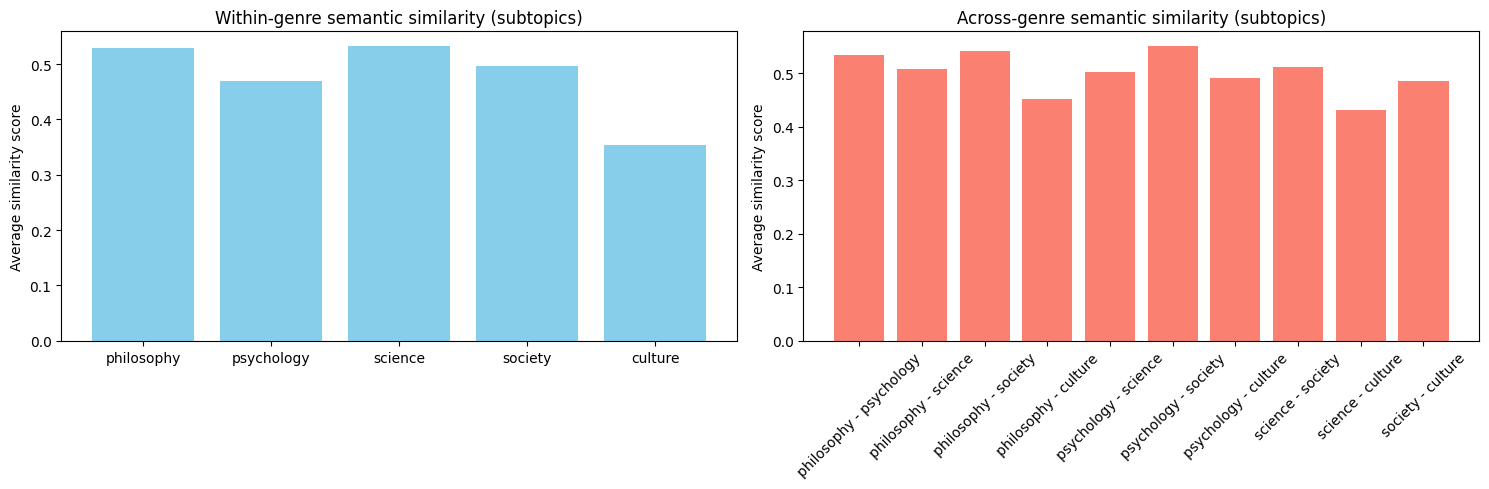

In [14]:
# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].bar(within_genre_similarity.keys(), within_genre_similarity.values(), color='skyblue')
ax[0].set_title("Within-genre semantic similarity (subtopics)")
ax[0].set_ylabel("Average similarity score")
ax[1].bar(across_genre_similarity.keys(), across_genre_similarity.values(), color='salmon')
ax[1].set_title("Across-genre semantic similarity (subtopics)")
ax[1].set_ylabel("Average similarity score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [15]:
# count the number of subtopics in each genre
genre_subtopic_counts = {genre: len(topics) for genre, topics in genres.items()} 
genre_subtopic_counts 

{'philosophy': 19,
 'psychology': 25,
 'science': 24,
 'society': 31,
 'culture': 15}

### p-value for testing significance of difference


In [16]:
# Example data structures
within_genre_scores = [0.53, 0.47, 0.53, 0.50, 0.35]  # philosophy, psychology, science, society, culture
across_genre_scores = [0.53, 0.51, 0.54, 0.45, 0.50, 0.55, 0.49, 0.51, 0.43, 0.48]  # pairs as listed


In [39]:
import scipy.stats as stats
import numpy as np


In [66]:
import scipy.stats as stats

# Example list of scores for each discipline

# Check for normality
for genre, vals in within_genre_scores.items():
    stat, p = stats.shapiro(vals)
    print(f"Shapiro-Wilk test for {genre}: Stat={stat:.4f}, P-value={p:.4f}")


Shapiro-Wilk test for philosophy: Stat=0.9452, P-value=0.0000
Shapiro-Wilk test for psychology: Stat=0.9925, P-value=0.1331
Shapiro-Wilk test for science: Stat=0.9827, P-value=0.0020
Shapiro-Wilk test for society: Stat=0.9951, P-value=0.1499
Shapiro-Wilk test for culture: Stat=0.9803, P-value=0.1209


In [82]:
import scipy.stats as stats

# Example list of scores for each discipline

# Check for normality
for genre, vals in across_genre_scores.items():
    stat, p = stats.shapiro(vals)
    print(f"Shapiro-Wilk test for {genre}: Stat={stat:.4f}, P-value={p:.4f}")

Shapiro-Wilk test for philosophy - psychology: Stat=0.9831, P-value=0.0000
Shapiro-Wilk test for philosophy - science: Stat=0.9800, P-value=0.0000
Shapiro-Wilk test for philosophy - society: Stat=0.9867, P-value=0.0000
Shapiro-Wilk test for philosophy - culture: Stat=0.9705, P-value=0.0000
Shapiro-Wilk test for psychology - science: Stat=0.9849, P-value=0.0000
Shapiro-Wilk test for psychology - society: Stat=0.9916, P-value=0.0002
Shapiro-Wilk test for psychology - culture: Stat=0.9812, P-value=0.0001
Shapiro-Wilk test for science - society: Stat=0.9931, P-value=0.0017
Shapiro-Wilk test for science - culture: Stat=0.9938, P-value=0.1496
Shapiro-Wilk test for society - culture: Stat=0.9771, P-value=0.0000


In [72]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp

# Assuming within_genre_scores is your dictionary with discipline names as keys
discipline_names = list(within_genre_scores.keys())  # List of discipline names
discipline_names


['philosophy', 'psychology', 'science', 'society', 'culture']

In [81]:
# Flatten the lists and create labels for Kruskal-Wallis test
data = []
labels = []
for genre, vals in within_genre_scores.items():
    data.extend(vals)
    labels.extend([genre] * len(vals))

# Conduct Kruskal-Wallis test
stat, p_val = stats.kruskal(*[within_genre_scores[genre] for genre in within_genre_scores])
print(f"Kruskal-Wallis test: Stat={stat:.4f}, P-value={p_val:.4f}")

# If significant, proceed with post-hoc tests
if p_val < 0.05:
    # Pairwise comparisons can be done with Dunn's test or pairwise Mann-Whitney U tests with a Bonferroni correction
    # This part requires additional steps or a specific package such as scikit-posthocs
    import scikit_posthocs as sp
    posthoc = sp.posthoc_dunn([within_genre_scores[genre] for genre in within_genre_scores], p_adjust='bonferroni')
    print(posthoc)


Kruskal-Wallis test: Stat=100.2918, P-value=0.0000
              1         2             3             4             5
1  1.000000e+00  0.000036  1.000000e+00  1.857515e-02  8.480839e-16
2  3.606655e-05  1.000000  2.616727e-06  2.534958e-01  2.136205e-06
3  1.000000e+00  0.000003  1.000000e+00  5.149981e-03  6.983945e-18
4  1.857515e-02  0.253496  5.149981e-03  1.000000e+00  3.036529e-11
5  8.480839e-16  0.000002  6.983945e-18  3.036529e-11  1.000000e+00


In [84]:
# Flatten the lists and create labels for Kruskal-Wallis test
data_a = []
labels_a = []
for genre, vals in across_genre_scores.items():
    data_a.extend(vals)
    labels_a.extend([genre] * len(vals))

# Conduct Kruskal-Wallis test
stat, p_val = stats.kruskal(*[across_genre_scores[genre] for genre in across_genre_scores])
print(f"Kruskal-Wallis test: Stat={stat:.4f}, P-value={p_val:.4f}")

# If significant, proceed with post-hoc tests
if p_val < 0.05:
    # Pairwise comparisons can be done with Dunn's test or pairwise Mann-Whitney U tests with a Bonferroni correction
    # This part requires additional steps or a specific package such as scikit-posthocs
    import scikit_posthocs as sp
    posthoc_a = sp.posthoc_dunn([across_genre_scores[genre] for genre in across_genre_scores], p_adjust='bonferroni')
    print(posthoc_a)


Kruskal-Wallis test: Stat=184.0976, P-value=0.0000
              1             2             3             4             5   \
1   1.000000e+00  7.981255e-01  1.000000e+00  4.620338e-06  7.688009e-03   
2   7.981255e-01  1.000000e+00  2.452226e-02  5.725373e-02  1.000000e+00   
3   1.000000e+00  2.452226e-02  1.000000e+00  9.027497e-09  2.349619e-05   
4   4.620338e-06  5.725373e-02  9.027497e-09  1.000000e+00  8.816187e-01   
5   7.688009e-03  1.000000e+00  2.349619e-05  8.816187e-01  1.000000e+00   
6   1.000000e+00  3.616738e-03  1.000000e+00  2.856200e-10  6.567806e-07   
7   1.660117e-02  1.000000e+00  1.602315e-04  1.000000e+00  1.000000e+00   
8   1.293110e-01  1.000000e+00  8.945171e-04  5.953938e-02  1.000000e+00   
9   1.945810e-16  7.551875e-09  1.066256e-21  4.052322e-01  8.345438e-07   
10  1.172332e-03  1.000000e+00  3.112411e-06  1.000000e+00  1.000000e+00   

              6         7             8             9             10  
1   1.000000e+00  0.016601  1.293110e-01 

In [85]:
print("Order of disciplines for testing:", list(within_genre_scores.keys()))
print("Order of disciplines for testing:", list(across_genre_scores.keys()))

Order of disciplines for testing: ['philosophy', 'psychology', 'science', 'society', 'culture']
Order of disciplines for testing: ['philosophy - psychology', 'philosophy - science', 'philosophy - society', 'philosophy - culture', 'psychology - science', 'psychology - society', 'psychology - culture', 'science - society', 'science - culture', 'society - culture']


### Interpretations
1. Within-genres: Philosophy (0.53) and Science (0.53) genre might have a relatively high degree of topical or thematic cohesion within genre, suggesting that Essays within these genres tend to discuss topics that are semantically closer to each other.While Culture genre (0.35) might have a greater diversity of subjects within genre compared to others. 
2. Across-genres: Aside from culture, all genres have cross-genre similarity scores over 0.5, suggesting interdisciplinary overlap or shared interest areas.
Conclusion: the genre of Culture might be the most diversified and unique genre, with subtopics having less semantic overlaps with other subtopics both within and across genres. 
Sample size problem: since Culture genre only has 15 subtopics, it is more susceptable to higher variability and outlier effects, leading to potential overestimation of variability.

## Second Analysis: Semantic Similarity for Essays on Genres

In [20]:
##Use pipe to analyze the essay contents through NLP
essays_ner_large = list(nlp.pipe(aeon.essay, disable=["parser", "ner"], batch_size=50)) 
## essay is batched given each essay content is relatively long (3000-7000 words approximately)

In [21]:
# Apply the remove_stopwords_spacy function to the 'text' column
aeon['cw_text'] = aeon['essay'].apply(stopwords_remove)


aeon

,title,description,essay,authors,genre,cw_text
0,space exploration,when self-replicating craft bring life to the ...,"some time late this century, someone will push...",Jay Olson,science,time late century push button unleashing life ...
1,history of science,"to the detriment of the public, scientists and...",would boycotting russian scientists be an effe...,Lorraine Daston & Peter Harrison,science,boycotting russian scientists effective protes...
2,religion,"once a centre of afghan culture, sufism seems ...",my introduction into the world of afghanistanâ...,Annika Schmeding,society,introduction world afghanistanâs sufism bega...
3,thinkers and theories,the intrepid logician kurt gã¶del believed in ...,"as the foremost logician of the 20th century, ...",Alexander T Englert,philosophy,foremost logician 20th century kurt gã¶del kno...
4,thinkers and theories,"for rachel bespaloff, philosophy was a sensual...",shortly after rachel bespaloffâs suicide in ...,Isabel Jacobs,philosophy,shortly rachel bespaloffâs suicide 1949 frie...
...,...,...,...,...,...,...
2230,architecture,we can build structures that last for centurie...,make a model of the world in your mind. popula...,Marek Kohn,culture,model world mind populate starting people know...
2231,human rights and justice,the ruling that anders breivik is sane leaves ...,anders behring breivik has been declared sane ...,Stephen Cave,society,anders behring breivik declared sane criminall...
2232,demography and migration,"despite its turmoil, ever more people are risk...",itâs 9.30pm and i am in a police station in ...,Helena Drysdale,society,itâs 9.30pm police station didimoticho greco...
2233,ecology and environmental sciences,we picture ancient britain as a land of enchan...,"as part of a recent walk across england, i ent...",Hugh Thomson,science,recent walk england entered chilterns western ...


### Data Visualization: Content Lengths Across Genres

In [22]:
# This step is for addressing potential variations in the length of the essays across genres
# Calculate the average number of tokens in each essay
aeon['num_tokens'] = aeon['cw_text'].apply(lambda x: len(nlp(x)))
# Calculate the average number of tokens in each genre
average_tokens_by_genre = aeon.groupby('genre')['num_tokens'].mean()
average_tokens_by_genre

genre
culture       1693.954717
philosophy    1645.579176
psychology    1687.779279
science       1821.822816
society       1796.588055
Name: num_tokens, dtype: float64

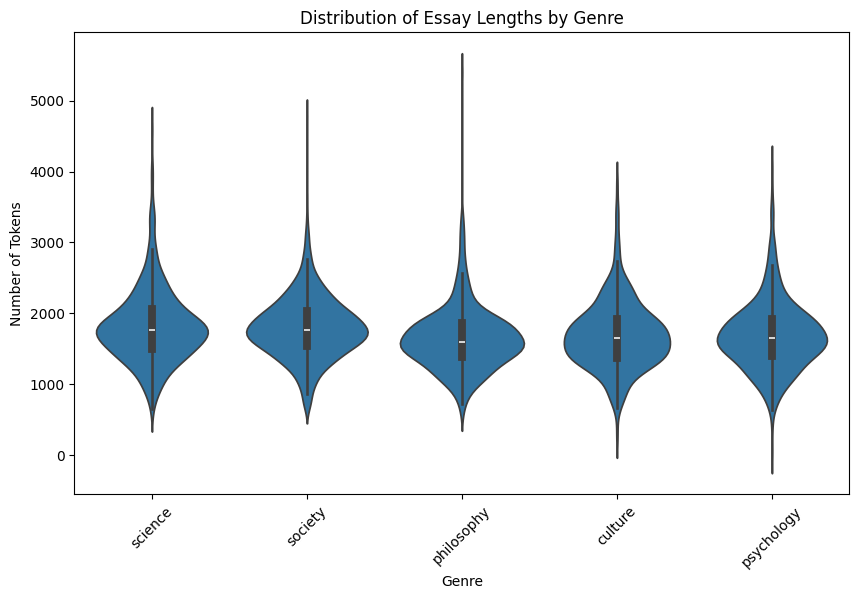

In [23]:
#visualize the distribution of essay lengths by genre
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  # Set the size of the figure

# Create a violin plot 
sns.violinplot(x='genre', y='num_tokens', data=aeon)

plt.title('Distribution of Essay Lengths by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Tokens')
plt.xticks(rotation=45)  # Rotate the x labels to prevent overlap
plt.show()


The distribution of essay length is pretty averaged across genres - checked!

### Set up "Sample String" for Each Genre

In [24]:
# Transform the topic to string form
philosophy_str = " ".join(philosophy)
psychology_str = " ".join(psychology)
science_str = " ".join(science)
society_str = " ".join(society)
culture_str = " ".join(culture)

#Combine into a list
genre_str = [philosophy_str, psychology_str, science_str, society_str, culture_str]

# Remove Stopwords
genre_str_cw = [stopwords_remove(text) for text in genre_str]

#Pipe the list for later comparison
genre_docs = list(nlp.pipe(genre_str_cw))

### Compare Semantic Similarity Between Each Essay and the Sample Strings

In [25]:
docs = list(nlp.pipe(aeon['cw_text'], disable=["parser", "ner"], batch_size=50)) #spacy all the texts in the dataframe
# Initialize lists to hold similarity scores for each genre
doc_similarity_scores = {genre: [] for genre in ['philosophy', 'psychology', 'science', 'society', 'culture']}
#Create a list of list; for each essay genre, we will have a separate list coding its own similarity score
# Calculate similarity scores
for doc in docs:
    for genre_doc, genre_name in zip(genre_docs, ['philosophy', 'psychology', 'science', 'society', 'culture']):
        similarity_score = doc.similarity(genre_doc)
        doc_similarity_scores[genre_name].append(similarity_score) #append the similarity score to the list

In [26]:
#Add similarity scorings to the original dataset as separate columns

for genre in doc_similarity_scores:
    # Create a new column in 'aeon' for each genre's similarity score
    aeon[f'{genre}_similarity'] = doc_similarity_scores[genre]

aeon

,title,description,essay,authors,genre,cw_text,num_tokens,philosophy_similarity,psychology_similarity,science_similarity,society_similarity,culture_similarity
0,space exploration,when self-replicating craft bring life to the ...,"some time late this century, someone will push...",Jay Olson,science,time late century push button unleashing life ...,1783,0.800169,0.814278,0.823928,0.852559,0.706126
1,history of science,"to the detriment of the public, scientists and...",would boycotting russian scientists be an effe...,Lorraine Daston & Peter Harrison,science,boycotting russian scientists effective protes...,1753,0.879167,0.853708,0.889465,0.922739,0.762675
2,religion,"once a centre of afghan culture, sufism seems ...",my introduction into the world of afghanistanâ...,Annika Schmeding,society,introduction world afghanistanâs sufism bega...,2005,0.800258,0.799968,0.772903,0.876917,0.743235
3,thinkers and theories,the intrepid logician kurt gã¶del believed in ...,"as the foremost logician of the 20th century, ...",Alexander T Englert,philosophy,foremost logician 20th century kurt gã¶del kno...,1938,0.877762,0.869903,0.859637,0.888094,0.729652
4,thinkers and theories,"for rachel bespaloff, philosophy was a sensual...",shortly after rachel bespaloffâs suicide in ...,Isabel Jacobs,philosophy,shortly rachel bespaloffâs suicide 1949 frie...,1552,0.844727,0.849739,0.795693,0.849101,0.781565
...,...,...,...,...,...,...,...,...,...,...,...,...
2230,architecture,we can build structures that last for centurie...,make a model of the world in your mind. popula...,Marek Kohn,culture,model world mind populate starting people know...,724,0.771375,0.802616,0.806436,0.858646,0.712570
2231,human rights and justice,the ruling that anders breivik is sane leaves ...,anders behring breivik has been declared sane ...,Stephen Cave,society,anders behring breivik declared sane criminall...,704,0.814982,0.839365,0.760572,0.851410,0.686754
2232,demography and migration,"despite its turmoil, ever more people are risk...",itâs 9.30pm and i am in a police station in ...,Helena Drysdale,society,itâs 9.30pm police station didimoticho greco...,988,0.603617,0.664191,0.662362,0.750466,0.621754
2233,ecology and environmental sciences,we picture ancient britain as a land of enchan...,"as part of a recent walk across england, i ent...",Hugh Thomson,science,recent walk england entered chilterns western ...,647,0.683818,0.709500,0.743348,0.757175,0.697204


### Data Analysis

#### Data Visualization: Barplots of Mean Similarity Scores Across Genres

C:\Users\StarGazer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\StarGazer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\StarGazer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is 

<Figure size 1400x800 with 0 Axes>

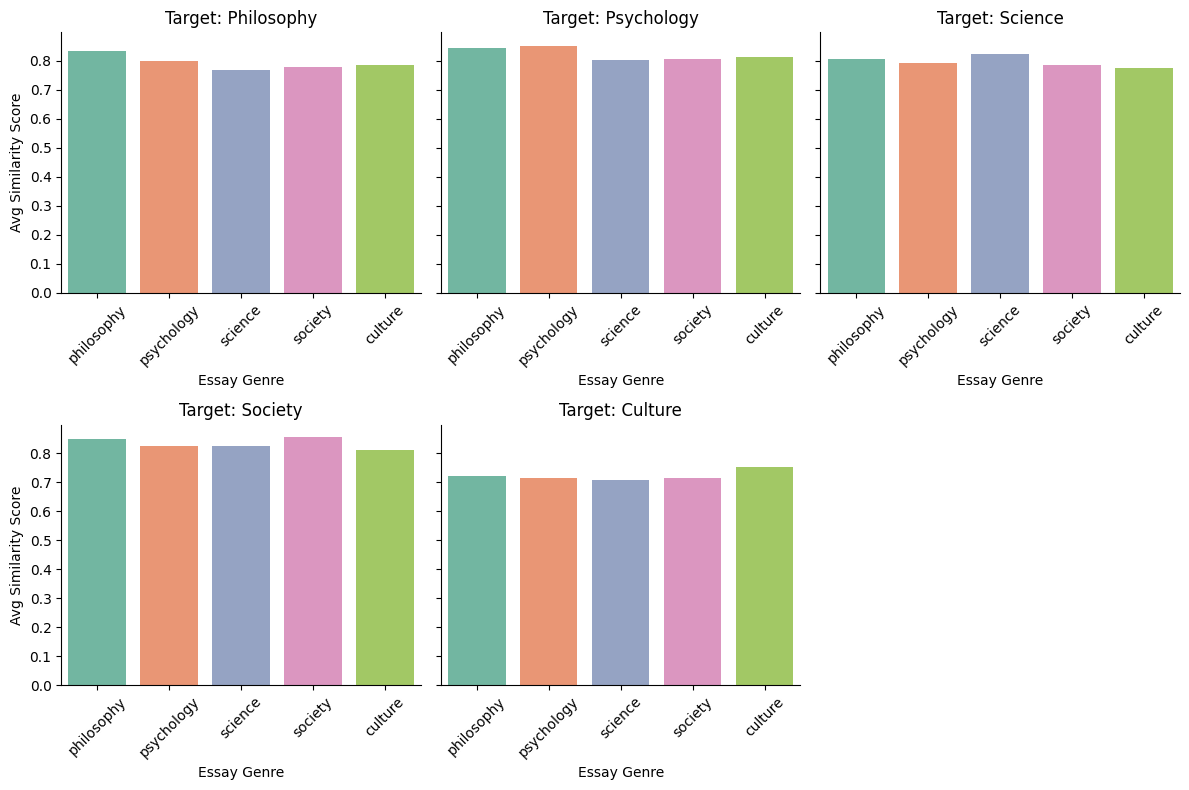

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of genres
genres = ['philosophy', 'psychology', 'science', 'society', 'culture']

# Calculate average similarity scores for each genre pair and reshape the data for plotting
data_for_plotting = []

for target_genre in genres:
    # For each target genre, calculate the mean similarity score across essays of each actual genre
    for actual_genre in genres:
        mean_score = aeon[aeon['genre'] == actual_genre][f'{target_genre}_similarity'].mean()
        data_for_plotting.append({'Actual Genre': actual_genre, 
                                  'Target Genre': target_genre, 
                                  'Average Similarity Score': mean_score})

# Convert the list of dictionaries into a DataFrame
reshaped_data = pd.DataFrame(data_for_plotting)

# Plotting
plt.figure(figsize=(14, 8))

# Using seaborn's FacetGrid to create one plot for each 'Target Genre'
g = sns.FacetGrid(reshaped_data, col="Target Genre", col_wrap=3, sharex=False, sharey=True, height=4)
g.map(sns.barplot, "Actual Genre", "Average Similarity Score", order=genres, palette="Set2")

# Adjust the labels and titles
for ax, title in zip(g.axes.flatten(), genres):
    ax.set_title(f'Target: {title.capitalize()}')
    ax.set_xlabel('Essay Genre')
    ax.set_ylabel('Avg Similarity Score')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [88]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [89]:
# List of all genres
genres = ['philosophy', 'psychology', 'science', 'society', 'culture']

# Dictionary to store ANOVA results
anova_results = {}

for target_genre in genres:
    # Collect data for ANOVA
    data = [aeon[aeon['genre'] == genre][f'{target_genre}_similarity'] for genre in genres]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(*data)
    anova_results[target_genre] = (f_stat, p_value)

    # Output ANOVA results
    print(f"ANOVA results for target genre {target_genre}: F-stat={f_stat:.4f}, P-value={p_value:.4f}")

    # If p-value indicates significance, proceed to post-hoc tests
    if p_value < 0.05:
        # Conduct Tukey's HSD test
        tukey = pairwise_tukeyhsd(endog=aeon[f'{target_genre}_similarity'],
                                  groups=aeon['genre'],
                                  alpha=0.05)
        print(f"Tukey's post-hoc test for {target_genre}:\n{tukey}")


ANOVA results for target genre philosophy: F-stat=105.1712, P-value=0.0000
Tukey's post-hoc test for philosophy:
    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   culture philosophy   0.0481    0.0  0.0373   0.059   True
   culture psychology   0.0134  0.007  0.0025  0.0243   True
   culture    science  -0.0154 0.0013 -0.0265 -0.0044   True
   culture    society  -0.0052 0.6341 -0.0154   0.005  False
philosophy psychology  -0.0347    0.0  -0.044 -0.0254   True
philosophy    science  -0.0636    0.0 -0.0731 -0.0541   True
philosophy    society  -0.0533    0.0 -0.0619 -0.0448   True
psychology    science  -0.0289    0.0 -0.0385 -0.0193   True
psychology    society  -0.0186    0.0 -0.0273   -0.01   True
   science    society   0.0102 0.0137  0.0014  0.0191   True
------------------------------------------------------------
ANOVA results for target genre ps

### Interpretations:
The statistical analysis conducted through independent t-tests comparing the average semantic similarity scores between genres reveals highly significant differences, demonstrating that essays tend to be more similar within their own genre compared to others. Notably, every comparison involving philosophy, psychology, science, and culture with other genres showed significant results with extremely low original and adjusted p-values, indicating robust statistical significance even after adjusting for multiple comparisons using the Bonferroni method.

Specifically, the comparisons where philosophy is compared against psychology, science, society, and culture yield very high t-statistics ranging from 10.93 to 18.09, all with p-values effectively at zero, even after adjustment. This indicates a strong and significant difference in similarity scores, with philosophy essays being considerably more similar to each other than to essays from other genres.

Similarly, the tests involving psychology, science, and culture against other genres also show substantial t-values and negligible p-values, reinforcing the distinctiveness of essays within these genres as well. For example, psychology's comparison against science and society yielded t-values of 15.29 and 16.95 respectively, both with zero p-values after adjustment.

However, the comparisons involving society show a slightly different pattern. While most comparisons are still significant, the comparison of society vs philosophy and society vs culture shows adjusted p-values that exceed the significance threshold (p=1.000 and p=0.000, respectively), suggesting that while there is a detectable difference, it may not be as pronounced or statistically significant as those involving other genres, especially after adjustment for multiple testing.

This pattern strongly supports the hypothesis that essays are more semantically similar within their own genres than across different genres, with substantial statistical backing across most genre pairings. This distinctiveness in semantic content could potentially be leveraged in genre classification algorithms, enhancing their accuracy and effectiveness.

### Interpretations
1. Overall, an Essay genre will have the highest averaged similarity score for their according genre (e.g. Philosophy Essays have highest averaged Philosophy similarity score). This is **consistent with our prediction**.
2. Philosophy Essays also scores high in averaged Psychology and Society similarity, suggesting potential overlaps between topics.


## Third Analysis: Model Training and Accuracy

#### Resample the dataset

To ensure the accuracy of training model and address any potential imbalanced representation of features, the dataset is sampled to ensure that each genre has the same sample size.

Consider that Culture genre has only 265 essays, other genres are resampled to contain 265 essays each.


In [30]:
# Sample 265 essays from each genre
sampled_df = pd.DataFrame()

genres = ['philosophy', 'psychology', 'science', 'society', 'culture']

for genre in genres:
    # Sample 265 entries from each genre, if there are fewer than 265, take all
    sampled_sub_df = aeon[aeon['genre'] == genre].sample(n=265, replace=False, random_state=42)
    sampled_df = pd.concat([sampled_df, sampled_sub_df])

# Reset index of the resulting DataFrame
sampled_df = sampled_df.reset_index(drop=True)

print(sampled_df["genre"].value_counts()) # Check the number of essays in each genre

genre
philosophy    265
psychology    265
science       265
society       265
culture       265
Name: count, dtype: int64


#### Build up Machine Learning Pipeline

In [31]:
# Features
X = sampled_df[['philosophy_similarity', 'psychology_similarity', 'science_similarity', 'society_similarity', 'culture_similarity']]

# Target
y = sampled_df['genre']
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y) #Fit into the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42) #Train the model with existing data
y_test.shape

(265,)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #Generate accuracy scoring

# Initialize the classifier
clf = LogisticRegression()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))


Accuracy: 0.5735849056603773

Classification Report:
               precision    recall  f1-score   support

     culture       0.63      0.68      0.65        53
  philosophy       0.42      0.71      0.53        51
  psychology       0.71      0.39      0.51        56
     science       0.55      0.63      0.59        49
     society       0.77      0.48      0.59        56

    accuracy                           0.57       265
   macro avg       0.62      0.58      0.57       265
weighted avg       0.62      0.57      0.57       265



#### Interpretations:
1. With an accuracy score of 0.57, the model correctly predicts the genre for a little over half of the essays in the test set.
2. Weighted Average of 0.62 precision, 0.57 recall, and 0.57 F1-score suggests a moderate performances of classification without biases toward a particular genre

**Still rooms for potential improvements!**

### Interpretations for Logistic Coefficients


In [33]:
import pandas as pd

# Mapping encoded labels back to original genre names
genre_names = encoder.inverse_transform(clf.classes_)

# Create a DataFrame for coefficients for better readability

coefs_df_list = []
for i, genre_name in enumerate(genre_names):
    coefs_df = pd.DataFrame({'variable': clf.feature_names_in_,
                             f'coef_{genre_name}': clf.coef_[i]}) 
    coefs_df_list.append(coefs_df)

full_coefs_df = pd.concat(coefs_df_list, axis=1)

# Removing duplicate 'variable' columns after concatenation
full_coefs_df = full_coefs_df.loc[:,~full_coefs_df.columns.duplicated()]
print(full_coefs_df)


                variable  coef_culture  coef_philosophy  coef_psychology  \
0  philosophy_similarity     -0.392003         4.808420         0.173452   
1  psychology_similarity     -0.847309         1.972711         4.350781   
2     science_similarity     -2.626987        -0.056636        -0.536690   
3     society_similarity     -2.714975         1.109231        -1.668379   
4     culture_similarity      5.380428        -1.204692        -1.025601   

   coef_science  coef_society  
0     -3.386562     -1.203306  
1     -3.081697     -2.394487  
2      4.914241     -1.693927  
3     -1.219617      4.493740  
4     -2.326307     -0.823828  


#### Interpretations
1. The coefficients represents how changes in the similarity scores influence the likelihood of an essay being classified into that genre.
2. Overall, likelihood of classification is strongly positively associated with similarity score of its own genre, this is align with our hypothesis that **similarity score can be used to predict genre classification for Aeon Essays**.
3. Philosophy genre has positive coefficients for psychology and society similarities, but this effect is not shown for Psychology and Society genres. This suggests that essays with higher psychology and society similarity also has increased likelihood for being a Philosophy essay, but not vice versa.
4. Culture similarity has the highest positive coefficient for predicting culture genre likelihood, suggesting that similarity to culture genre is the strongest predictor of culture genre classification. This might be linked with the effect that culture subtopics has the lowest within and across genre subtopic similarities - these subtopics might be more "unique" than the other genres.

## Visualization: Confusion Matrix for Logistic Regression


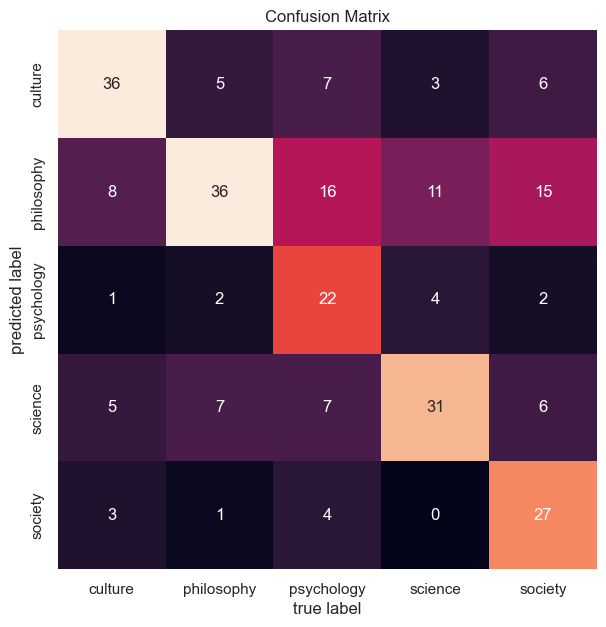

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Compute confusion matrix
mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')
plt.show()


1. Overall correct predictions are high, suggesting good accuracy
2. Psychology and Society (and Science) essays has high instances of be misclassified under Philosophy genre (consistent with the coefficient analysis)

### Alternative: SVC for Training and Confusion Matrix

In [35]:
from sklearn.svm import SVC
clg = SVC()

# Train the classifier
clg.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = clg.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc, target_names=encoder.classes_))

Accuracy: 0.630188679245283

Classification Report:
               precision    recall  f1-score   support

     culture       0.61      0.75      0.67        53
  philosophy       0.69      0.61      0.65        51
  psychology       0.62      0.61      0.61        56
     science       0.56      0.63      0.60        49
     society       0.70      0.55      0.62        56

    accuracy                           0.63       265
   macro avg       0.64      0.63      0.63       265
weighted avg       0.64      0.63      0.63       265



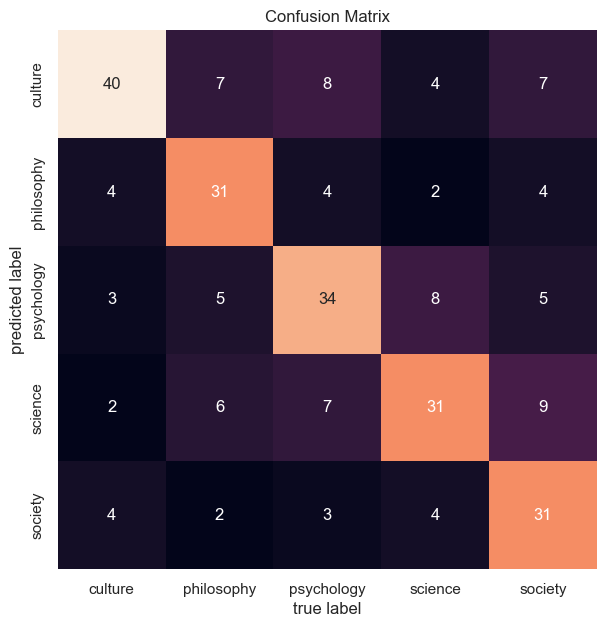

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Compute confusion matrix
mat = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=encoder.classes_,
            yticklabels=encoder.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix')
plt.show()


#### Interpretations
SVC (Support Vector Classifier) is performing much better in prediction than Logistic Regression. However, given the complex decision-making process of SVC, the coefficients are not as easily interpretable as that of logistic regression, making it not suitable for explaning variabilities in variables for data analysis.


## Discussion


### General Conclusions

**RQ1-Subtopic Similarities**: While Culture genre has the most unique subtopics (across all subtopics), there are moderate similarities both within and between genres, suggesting a general similarity for all subtopics regardless of genre.

**RQ2-Genre Similarities**:Essays have highest similarity scores of their own genres

**RQ3-Model Prediction**:Machine learning model can be established to predict text genre with moderate accuracy. Misspecification is least for Culture genre and most likely for Psychology and Society genre (being misclassified as Philosophy).

### Limitations
* While the variability of Essay length across genre is being addressed (not significant according to violin graph), the **imbalanced sample size** across the five genres for both essays and subtopics might cause biases in the variations in the averaged similarity scores. Given Culture genre has the smallest sample size in the original data, this might be attributable to its pronounced deviation in variables.
* The sorted out content word entries still contains **Noises** (e.g. typos and random signs), which can reduce the quality of similarity analysis and model training.
* Other factors that might mediate genre similarity, such as **Author information** (whether or not Essays are written by the same author) might be addressed.
* The **publication time** of the essays is not presented in the dataset, so that the longitudinal variability in language styles of the essays are not accounted for.
* Other features (TF-IDF, NER, etc.) might be incorporated to improve model performances




### Future studies
* Incorporate the subtopic and essay analysis together: hierarchial analysis, joint feature space, etc.
* Improve the model by incorporating more features and adapt alternative algorithms
* Examine the semantic similarity between description (the short introductory sentence) 
* Account for the longitudinal variations in linguistic features of Essays (given available data)

## References
About. (n.d.). Aeon. Retrieved February 29, 2024, from https://aeon.co/about

DataCamp. (2019, Dec). Understanding logistic regression in Python. Retrieved from https://www.datacamp.com/tutorial/understanding-logistic-regression-python

Zhang, P. Y. (2013). The application of semantic similarity in text classification. Applied Mechanics and Materials, 346, 141–144. https://doi.org/10.4028/www.scientific.net/AMM.346.141

Rezapour Asheghi, N. (2015). Human annotation and automatic detection of web genres (Doctoral dissertation, University of Leeds).

Nauer, E., & Napoli, A. (2006). A proposal for annotation, semantic similarity and classification of textual documents. In Artificial Intelligence: Methodology, Systems, and Applications: 12th International Conference, AIMSA 2006, Varna, Bulgaria, September 12-15, 2006. Proceedings 12 (pp. 201-212). Springer Berlin Heidelberg.

Lee, Y. B., & Myaeng, S. H. (2002, August). Text genre classification with genre-revealing and subject-revealing features. In Proceedings of the 25th annual international ACM SIGIR conference on Research and development in information retrieval (pp. 145-150).
